In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# **Import models**

# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
import os
from glob import glob

In [ ]:
IMAGE_SIZE = [224, 224]


#Preprocessing

In [ ]:
resnet = ResNet50(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)

for layer in resnet.layers:
  layer.trainable = False

x = Flatten()(resnet.output)

prediction = Dense(2, activation='softmax')(x)
model = Model(inputs=resnet.input, outputs=prediction)

model.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_____________________________

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='Adam',
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,validation_split=0.25)

In [ ]:
train = '/content/drive/MyDrive/COMBINED/dataset'
training_set = train_datagen.flow_from_directory(train,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 subset='training',
                                                 class_mode = 'categorical')


val_set = train_datagen.flow_from_directory(train,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            subset='validation',
                                            class_mode = 'categorical')


history = model.fit(
  training_set,steps_per_epoch=len(training_set),
  validation_data=val_set,validation_steps=len(val_set),
  epochs=10,
)

Found 210 images belonging to 2 classes.
Found 68 images belonging to 2 classes.
Epoch 1/10
7/7 [==============================] - 95s 14s/step - loss: 1.4355 - accuracy: 0.6619 - val_loss: 0.9284 - val_accuracy: 0.7500
Epoch 2/10
7/7 [==============================] - 16s 2s/step - loss: 0.7080 - accuracy: 0.8000 - val_loss: 0.5011 - val_accuracy: 0.7500
Epoch 3/10
7/7 [==============================] - 16s 3s/step - loss: 0.4232 - accuracy: 0.8238 - val_loss: 0.5239 - val_accuracy: 0.7500
Epoch 4/10
7/7 [==============================] - 16s 2s/step - loss: 0.4713 - accuracy: 0.8762 - val_loss: 0.5461 - val_accuracy: 0.8676
Epoch 5/10
7/7 [==============================] - 16s 2s/step - loss: 0.2893 - accuracy: 0.8762 - val_loss: 0.5525 - val_accuracy: 0.8382
Epoch 6/10
7/7 [==============================] - 16s 3s/step - loss: 0.2630 - accuracy: 0.8714 - val_loss: 0.4153 - val_accuracy: 0.8971
Epoch 7/10
7/7 [==============================] - 16s 2s/step - loss: 0.1903 - accuracy: 0

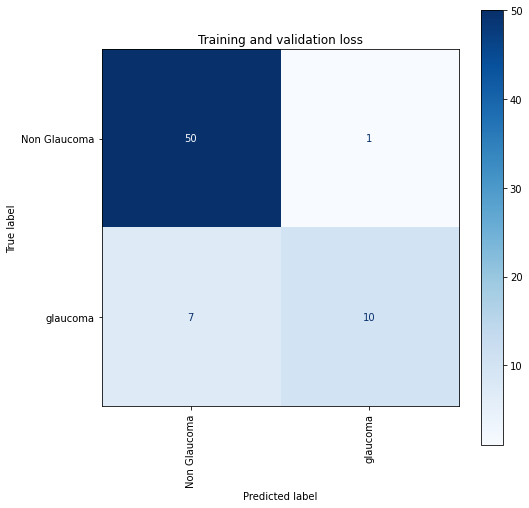

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
class_names = []
class_names = list(val_set .class_indices.keys())
y_true = []
for i in range(0,len(val_set )):
  y_true.extend(np.array(val_set [i][1]))
y_true = np.argmax(y_true,axis = 1)
y_pred = model.predict(val_set ) 
y_pred = np.argmax(y_pred, axis = 1)
cnf_matrix = confusion_matrix(y_true,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix,display_labels=class_names)
fig,ax = plt.subplots(figsize=(8,8))
disp = disp.plot(include_values=True,cmap='Blues', xticks_rotation='vertical', values_format='.3g', ax=ax)
plt.title('Training and validation loss')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


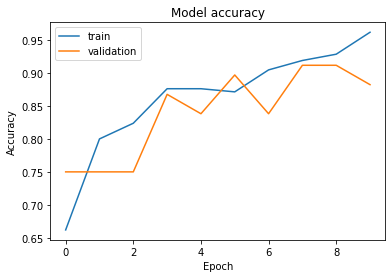

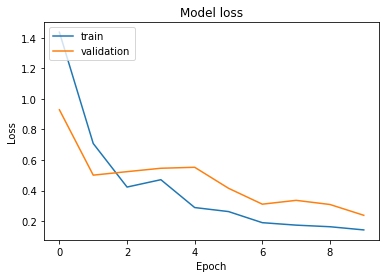

In [ ]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()